# OCR (Optical Character Recognition) usando Tesseract

In [63]:
#Instalando bibliotecas necessárias
""" !pip install pytesseract
!pip install tesseract
!pip install opencv-python """

' !pip install pytesseract\n!pip install tesseract\n!pip install opencv-python '

In [64]:
import pytesseract
import cv2

In [65]:
# Lendo a imagem
imagem = cv2.imread('./imagens/img1.png')

# Obtendo o tipo da imagem
print(type(imagem))

# Imprimindo o conteúdo da imagem
# print(imagem)

# Rows, columns, and channels
print(imagem.shape)

<class 'numpy.ndarray'>
(2339, 1656, 3)


### **Removendo Ruído da Imagem**

In [66]:
imagem = cv2.medianBlur(imagem, 3)

In [67]:
cv2.imwrite('./imagens/img1_sem_ruido.png',imagem)

True

### **Extraindo Texto da Imagem**

In [68]:
texto_extraido = pytesseract.image_to_string(img)
print(texto_extraido)

arquivo_texto = open('./imagens/img1_texto.txt', 'w')
arquivo_texto.write(texto_extraido)

Lorem ipsum dolor sit amet,
consectetur adipiscing elit. Sed aliquet
purus ut lacus vestibulum laoreet.
Maecenas rutrum eget ex sit amet
semper. Suspendisse in nulla sit amet
leo luctus venenatis. Donec id diam
varius, fermentum sem vel,
condimentum nibh. Aliquam = rutrum
sollicitudin dictum. Suspendisse a
massa nec massa luctus vulputate non
et urna. Phasellus ornare urna purus,
ultrices aliquam dolor ornare ornare.
Phasellus hendrerit lacinia urna
posuere varius. Aliquam vehicula
tincidunt risus, at condimentum libero
tristique sit amet. In vitae laoreet tortor,
vel sollicitudin justo. Pellentesque
habitant morbi tristique senectus et
netus et malesuada fames ac turpis
egestas. Maecenas rutrum neque sit
amet lectus consequat, gravida
imperdiet dolor auctor. Phasellus
bibendum augue a_ lacus. viverra
aliquam. Suspendisse blandit ligula ac
arcu viverra, dignissim malesuada
urna. aliquam. Sed condimentum
massa sit amet rutrum lobortis.

Ut et aliquam dolor. Quisque porta
auctor nulla. V

3010

### **Identificando o Número de Colunas**

In [69]:
# !pip install scikit-image

In [70]:
import matplotlib.pyplot as plt     
import numpy as np
from scipy import signal
from skimage import io         

In [71]:
# Convertendo a imagem em escala de cinza
tons_cinza = cv2.cvtColor(imagem, cv2.COLOR_RGB2GRAY)
cv2.imwrite('./imagens/img1_cinza.png',tons_cinza)

True

In [72]:
""" Realiza a binarização da imagem em tons de cinza tons_cinza usando o método de Otsu 
para calcular automaticamente o valor do limiar, e os pixels resultantes são invertidos 
(branco torna-se preto e vice-versa) """
thr = cv2.threshold(tons_cinza, 0, 255, cv2.THRESH_OTSU + cv2.THRESH_BINARY_INV)[1]

In [73]:
# Morphological closing with large vertical line kernel
thr_mod = cv2.morphologyEx(thr, cv2.MORPH_CLOSE, np.ones((imagem.shape[0], 1)))

# Count white pixels along y-axis
y_count = np.sum(thr_mod / 255, 0)

# Calculate absolute difference between neighbouring x-axis values
y_count_diff = np.abs(np.diff(y_count))

# Find peaks in that "signal"
peaks = signal.find_peaks(y_count_diff, distance=50)[0]

# Number of columns is half the number of found peaks
# n_cols = np.int(peaks.shape[0] / 2)
n_cols = int(peaks.shape[0] / 2)

# Text output
print('Number of columns: ' + str(n_cols))

Number of columns: 2


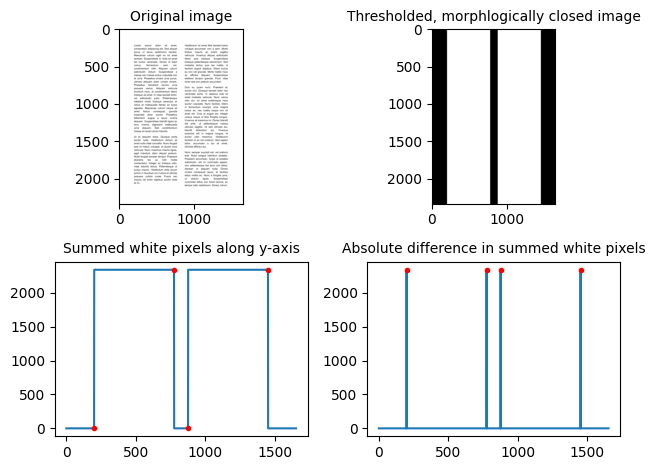

In [74]:
# Some visualization output
plt.figure(0)
plt.subplot(221)
plt.imshow(imagem)
plt.title('Original image', size=10)

plt.subplot(222)
plt.imshow(thr_mod, cmap='gray')
plt.title('Thresholded, morphlogically closed image', size=10)

plt.subplot(223)
plt.plot(y_count)
plt.plot(peaks, y_count[peaks], 'r.')
plt.title('Summed white pixels along y-axis', size=10)

plt.subplot(224)
plt.plot(y_count_diff)
plt.plot(peaks, y_count_diff[peaks], 'r.')
plt.title('Absolute difference in summed white pixels', size=10)

plt.tight_layout()
plt.show()